## **Example Application of SparsePLS**


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sklearn

# Import the SparsePLS class
from sparse_pls import SparsePLS, DataPreprocessor


### **1. Generate Synthetic Data**

We'll create a synthetic regression dataset with informative features.



In [2]:
# Generate synthetic data
X, y, coef = make_regression(
    n_samples=200,
    n_features=50,
    n_informative=10,
    noise=0.1,
    coef=True,
    random_state=42
)

# Convert to pandas DataFrame for better handling of feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='target')

### **2. Split the Data**

Split the dataset into training and testing sets.



In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ensure that X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [4]:
print(type(X_train))
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### **3. Initialize and Fit the SparsePLS Model**

Instantiate the `SparsePLS` model and fit it to the training data.

In [5]:
# Initialize the SparsePLS model
model = SparsePLS(
    n_components=2,     # Number of components
    alpha=0.5,          # Sparsity controlling parameter
    max_iter=1000,      # Maximum number of iterations
    tol=1e-6,           # Convergence tolerance
    scale=True,         # Whether to scale the data
    scale_method='standard'  # Scaling method
)

# Fit the model to the training data
model.fit(X_train, y_train)

c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 1: Norm of t = 16.5002, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 2: Norm of t = 13.9331, Deflation step completed.


,n_components,2
,alpha,0.5
,max_iter,1000
,tol,1e-06
,scale,True
,scale_method,'standard'


### **4. Make Predictions**

Use the trained model to predict target values for the test set.


In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

### **5. Evaluate the Model**

Calculate the Mean Squared Error (MSE) to evaluate model performance.

In [7]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1349.6955


### **6. Hyperparameter Optimization**

Use the `optimize_parameters` method to find the best hyperparameters.

In [8]:
# Define the parameter grid for optimization
param_grid = {
    'n_components': [1, 2, 3],
    'alpha': [0.1, 0.5, 1.0]
}

# Ensure X_train and y_train are DataFrames/Series with proper names
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if not isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = pd.Series(y_train, name='target')
    
# Optimize hyperparameters
model.optimize_parameters(
    X_train, y_train,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,                     # Use all available CPU cores
    verbose=1                      # Print progress messages
)


c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Fitting 9 parameter combinations across 5 folds...
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.5s finished
INFO:sparse_pls.model:Best parameters: {'alpha': 0.5, 'n_components': 3}
INFO:sparse_pls.model:Best cross-validation score: -914.1483
c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed 

,n_components,3
,alpha,0.5
,max_iter,1000
,tol,1e-06
,scale,True
,scale_method,'standard'


### **7. Evaluate the Optimized Model**

Make predictions with the optimized model and evaluate its performance.

In [9]:
# Predict on the test set with the optimized model
y_pred_optimized = model.predict(X_test)

# Calculate MSE
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"Optimized Mean Squared Error: {mse_optimized:.4f}")


Optimized Mean Squared Error: 451.8838


### **8. Interpret the Results**

Identify the selected features and visualize their importance.


Selected Features:
['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9' 'feature_10' 'feature_11'
 'feature_12' 'feature_13' 'feature_14' 'feature_15' 'feature_16'
 'feature_17' 'feature_18' 'feature_19' 'feature_20' 'feature_21'
 'feature_22' 'feature_23' 'feature_24' 'feature_25' 'feature_26'
 'feature_27' 'feature_28' 'feature_29' 'feature_30' 'feature_31'
 'feature_32' 'feature_33' 'feature_34' 'feature_35' 'feature_36'
 'feature_37' 'feature_38' 'feature_39' 'feature_40' 'feature_41'
 'feature_42' 'feature_43' 'feature_44' 'feature_45' 'feature_46'
 'feature_47' 'feature_48' 'feature_49']


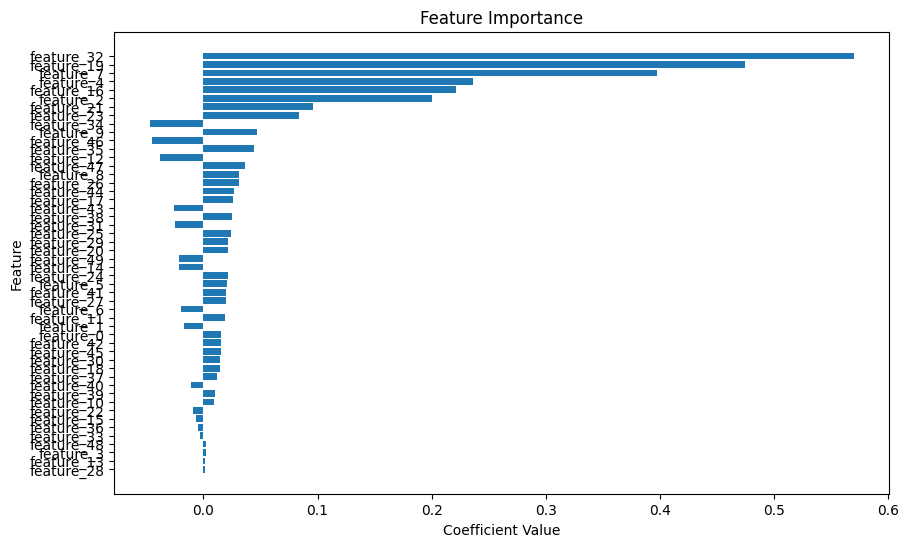

In [10]:
# Get selected variables
selected_features = model.feature_names_in_[model.selected_variables_]
print("Selected Features:")
print(selected_features)


# Get coefficients for the selected features
coefficients = model.coef_.ravel()[model.selected_variables_]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='AbsCoefficient', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Coefficient']
)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


### **9. Visualize Predicted vs Actual Values**

Plot the predicted values against the actual target values.


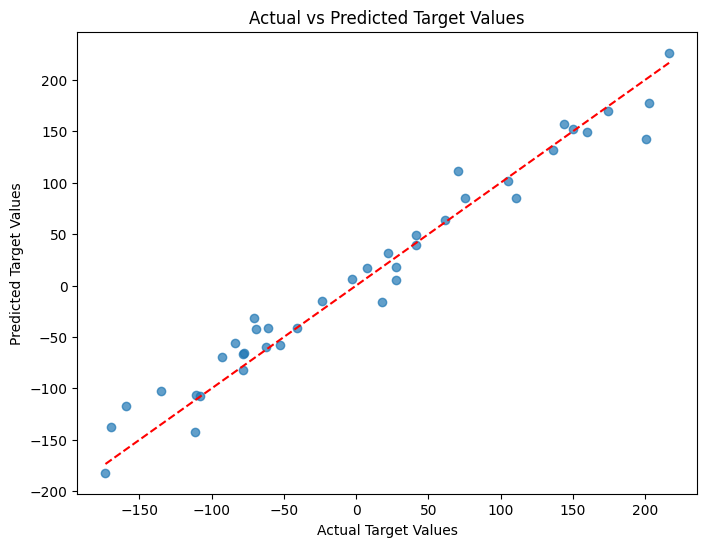

In [11]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values')
plt.show()

### **10. Conclusion**

The `SparsePLS` model effectively selects important features and predicts the target variable with reasonable accuracy. By incorporating sparsity, it enhances model interpretability by focusing on the most relevant variables.


## **Example 2: Multi-Target Regression**

SparsePLS supports multi-target regression where you predict multiple target variables simultaneously.

In [12]:
# Generate multi-target data
X_multi, Y_multi = make_regression(
    n_samples=200,
    n_features=30,
    n_informative=15,
    n_targets=3,  # Multiple targets
    noise=0.1,
    random_state=42
)

# Split the data
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = train_test_split(
    X_multi, Y_multi, test_size=0.2, random_state=42
)

# Fit SparsePLS model
model_multi = SparsePLS(n_components=3, alpha=0.5)
model_multi.fit(X_train_multi, Y_train_multi)

# Predict
Y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate each target
for i in range(Y_multi.shape[1]):
    mse = mean_squared_error(Y_test_multi[:, i], Y_pred_multi[:, i])
    print(f"Target {i+1} MSE: {mse:.4f}")

c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.813782
INFO:sparse_pls.model:Iteration 1: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.070623
INFO:sparse_pls.model:Iteration 2: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.004331
INFO:sparse_pls.model:Iteration 3: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000277
INFO:sparse_pls.model:Iteration 4: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000018
INFO:sparse_pls.model:Iteration 5: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000001
INFO:sparse_pls.model:Iteration 6: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 6.
I

Target 1 MSE: 3675.2230
Target 2 MSE: 2987.0465
Target 3 MSE: 2841.8817


## **Example 3: Pipeline Integration**

Integrate SparsePLS into a scikit-learn Pipeline for clean workflow.

In [13]:
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and SparsePLS
pipeline = Pipeline([
    ('preprocessor', DataPreprocessor(method='robust', impute_strategy='median')),
    ('sparsepls', SparsePLS(n_components=2, alpha=0.5, scale=False))  # Scaling done in preprocessing
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
print(f"Pipeline MSE: {mse_pipeline:.4f}")

# Access the trained model
sparsepls_model = pipeline.named_steps['sparsepls']
print(f"Number of selected features: {len(sparsepls_model.selected_variables_)}")

c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 1: Norm of t = 12.6796, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 2: Norm of t = 10.6990, Deflation step completed.


Pipeline MSE: 1493.7638
Number of selected features: 50


## **Example 4: Visualizing Latent Components**

Explore the latent space created by SparsePLS dimensionality reduction.

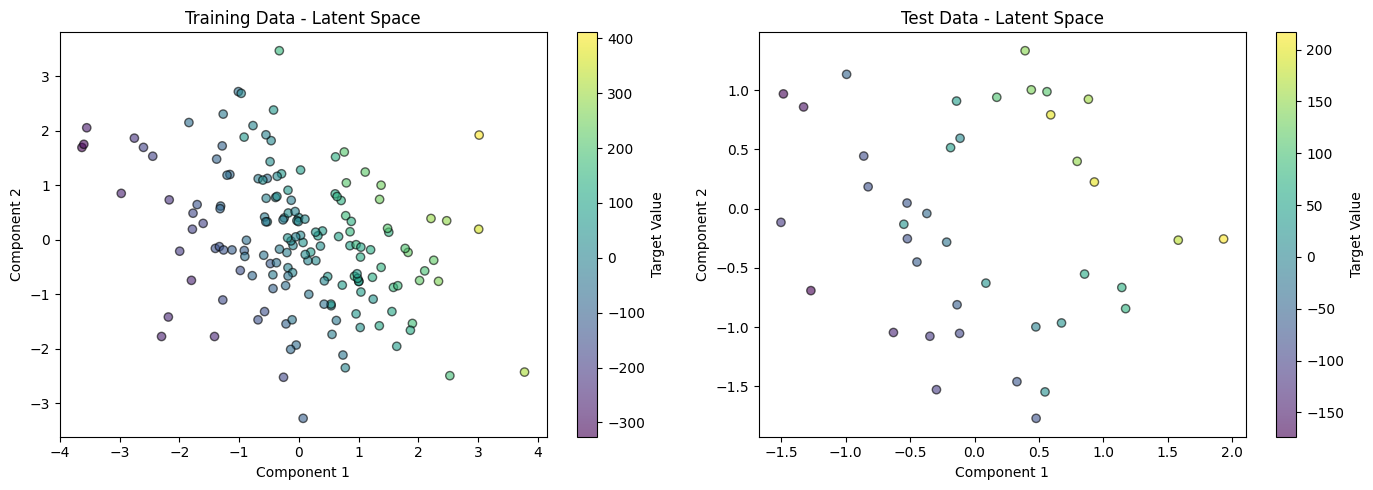

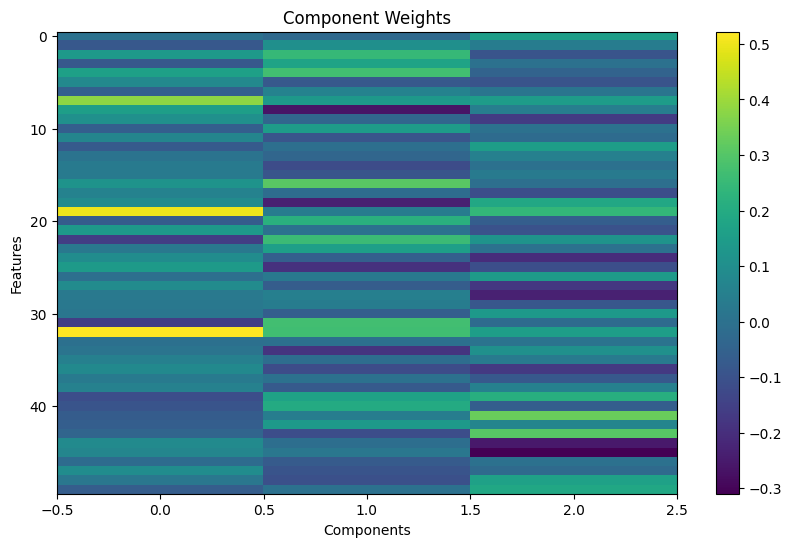

In [15]:
# Transform data to latent space
X_train_transformed = model.transform(X_train)
X_test_transformed = model.transform(X_test)

# Visualize the first two components
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
scatter1 = axes[0].scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], 
                c=y_train, cmap='viridis', alpha=0.6, edgecolors='k')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].set_title('Training Data - Latent Space')
plt.colorbar(scatter1, ax=axes[0], label='Target Value')

# Test data
scatter2 = axes[1].scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], 
                c=y_test, cmap='viridis', alpha=0.6, edgecolors='k')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].set_title('Test Data - Latent Space')
plt.colorbar(scatter2, ax=axes[1], label='Target Value')

plt.tight_layout()
plt.show()

# Component weights heatmap
fig = model.plot_weights()
plt.show()

## **Example 5: Real Dataset - Diabetes Dataset**

Apply SparsePLS to the diabetes dataset from scikit-learn.

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_diabetes = diabetes.target

print(f"Dataset shape: {X_diabetes.shape}")
print(f"Features: {list(X_diabetes.columns)}")

# Split data
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Fit SparsePLS
model_diabetes = SparsePLS(n_components=3, alpha=0.3)
model_diabetes.fit(X_train_db, y_train_db)

# Predict and evaluate
y_pred_db = model_diabetes.predict(X_test_db)
mse_db = mean_squared_error(y_test_db, y_pred_db)
r2_db = r2_score(y_test_db, y_pred_db)

print(f"\nResults on Diabetes Dataset:")
print(f"MSE: {mse_db:.2f}")
print(f"R² Score: {r2_db:.4f}")

# Get selected features
selected_features_db = model_diabetes.get_selected_feature_names()
print(f"\nSelected features ({len(selected_features_db)}/{len(X_diabetes.columns)}):")
for feat in selected_features_db:
    print(f"  - {feat}")

c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 1: Norm of t = 35.1220, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 2: Norm of t = 21.3060, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 3: Norm of t = 18.6540, Deflation step completed.
INFO:sparse_pls.model:Convergence reached at iteration 

Dataset shape: (442, 10)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Results on Diabetes Dataset:
MSE: 2861.60
R² Score: 0.4599

Selected features (10/10):
  - age
  - sex
  - bmi
  - bp
  - s1
  - s2
  - s3
  - s4
  - s5
  - s6


## **Example 6: Model Comparison**

Compare SparsePLS with other regression models.

c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 1: Norm of t = 14.9874, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 2: Norm of t = 13.3411, Deflation step completed.
INFO:sparse_pls.model:Iteration 0: Norm of w = 1.0000, Norm of c = 1.0000, Change in weights = 0.000000
INFO:sparse_pls.model:Convergence reached at iteration 0.
INFO:sparse_pls.model:Component 3: Norm of t = 11.4501, Deflation step completed.
c:\Users\AJEDDIG-Y\dev\python\Miniconda\Lib\site-packag

5-Fold Cross-Validation Results (Negative MSE):

Model                  Mean Score    Std Dev
---------------------------------------------
SparsePLS                 -914.15     285.23
Standard PLS              -940.28     278.77
Ridge                       -5.31       1.67
Lasso                       -3.45       0.71
ElasticNet               -1665.78     411.38


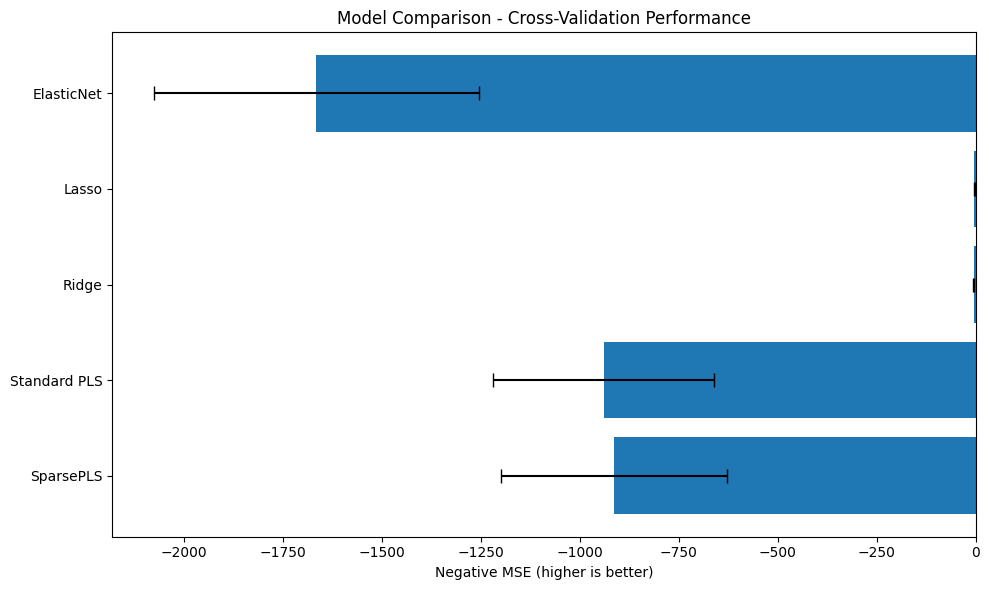

In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    'SparsePLS': SparsePLS(n_components=3, alpha=0.5),
    'Standard PLS': PLSRegression(n_components=3),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.5),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

# Compare models using cross-validation
results = {}
print("5-Fold Cross-Validation Results (Negative MSE):\n")
print(f"{'Model':<20} {'Mean Score':>12} {'Std Dev':>10}")
print("-" * 45)

for name, model in models.items():
    scores = cross_val_score(
        model, X_train, y_train, 
        cv=5, 
        scoring='neg_mean_squared_error'
    )
    results[name] = {
        'mean': scores.mean(),
        'std': scores.std()
    }
    print(f"{name:<20} {scores.mean():>12.2f} {scores.std():>10.2f}")

# Visualize comparison
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
means = [results[name]['mean'] for name in model_names]
stds = [results[name]['std'] for name in model_names]

plt.barh(model_names, means, xerr=stds, capsize=5)
plt.xlabel('Negative MSE (higher is better)')
plt.title('Model Comparison - Cross-Validation Performance')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()